In [13]:
import csv
from collections import defaultdict
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt  

df = pd.read_csv("2020-XTern-DS.csv") 
df.Average_Cost = [x.strip('$') for x in df.Average_Cost]
df.Average_Cost = [x.replace(",", "") for x in df.Average_Cost]
df['Average_Cost'] = df['Average_Cost'].astype(float)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df = df.dropna()
df['Rating'] = df['Rating'].astype(float)
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df = df.dropna()
df['Reviews'] = df['Reviews'].astype(float)
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df = df.dropna()
df['Votes'] = df['Votes'].astype(float)

Correlation coeffiecient between column Average_Cost and rating =  0.3481332189127086
As the Correlation coef. is fairly low we can say that there is no relationship between the columns- Average_Cost and rating.


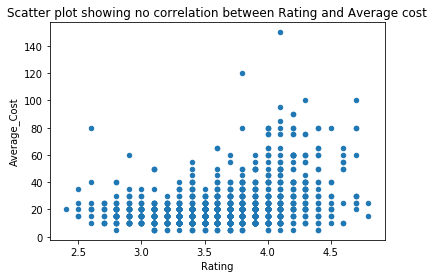


Correlation coeffiecient between column Votes and Reviews =  0.9644514962195194
As the Correlation coef. is very high, we can say that there is a positive relationship between the columns- Votes and Reviews.


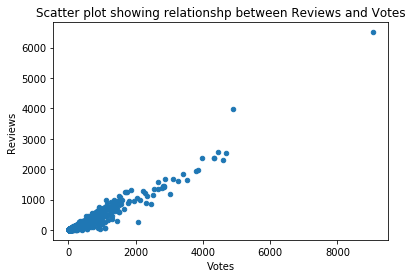

In [38]:

# A correlation coefficient is a numerical measure of some type of correlation, meaning a statistical relationship between two variables. 

print("Correlation coeffiecient between column Average_Cost and rating = ", df['Rating'].corr(df['Average_Cost']))
print("As the Correlation coef. is fairly low we can say that there is no relationship between the columns- Average_Cost and rating.")

df.plot.scatter(x='Rating', y='Average_Cost', title= "Scatter plot showing no correlation between Rating and Average cost");
plot.show()


print("")
print("Correlation coeffiecient between column Votes and Reviews = ", df['Votes'].corr(df['Reviews']))
print("As the Correlation coef. is very high, we can say that there is a positive relationship between the columns- Votes and Reviews.")

df.plot.scatter(x='Votes', y='Reviews', title= "Scatter plot showing relationshp between Reviews and Votes");
plot.show()



In [15]:
R_dict = defaultdict(list)

for index, row in df.iterrows():
    R_dict[row['Restaurant']].append(row['Average_Cost'])
    R_dict[row['Restaurant']].append(row['Rating'])
    R_dict[row['Restaurant']].append(row['Reviews'])
    R_dict[row['Restaurant']].append(row['Votes'])
    

R_points = defaultdict(int)
for r_id in R_dict.keys():
    if (R_dict[r_id])[2] < 5:
        R_points[r_id] = 0
    else:
        R_points[r_id] = (0.20* (R_dict[r_id])[0]) + (0.45* (R_dict[r_id])[1]) + (0.15* (R_dict[r_id])[2]) + (0.10* (R_dict[r_id])[3])
R_points = sorted(R_points.items(), key=lambda x: x[1], reverse=True)

cou = 0
top_5 = []
print("TOP 5 Restaurant according to us:")
for R_id, points in R_points:
    cou += 1
    top_5.append(R_id)
    if cou == 5:
        break
    
df.loc[df['Restaurant'].isin(top_5)]

TOP 5 Restaurant according to us:


,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
123,ID_2885,39.543546,-85.186797,"German, Italian, Cafe",45.0,$50.00,4.3,4691.0,2547.0,45 minutes
1180,ID_1064,39.587777,-85.564805,"Continental, North Indian, BBQ, Steak",80.0,$50.00,4.7,9054.0,6504.0,45 minutes
1300,ID_1666,39.959980,-85.903329,"Mexican, American, Italian, Burger",50.0,$99.00,4.6,4903.0,3989.0,65 minutes
1780,ID_2601,39.560512,-85.826137,"Bakery, Desserts, Sandwich",15.0,$50.00,4.1,4606.0,2311.0,45 minutes
1796,ID_6511,39.199394,-85.529664,"Street Food, Beverages",10.0,$50.00,3.9,4438.0,2576.0,45 minutes


In [18]:
cuisines_served = defaultdict(list)
cuisines_counter = defaultdict(int)

for index, row in df.iterrows():
    cuisines_served[row['Restaurant']] = row['Cuisines'].split(", ")
    for cuisine in cuisines_served[row['Restaurant']]:
        cuisines_counter[cuisine] += 1

cuisines_counter = sorted(cuisines_counter.items(), key=lambda x: x[1], reverse=True)

cou = 0

top_5 = []
print("TOP 5 cuisines that are served in most restaurants:")
for cuisine, count in cuisines_counter:
    cou += 1
    print(cou , ". ", cuisine , " is severved in " , count , " restaurant.")
    if cou == 5:
        break


TOP 5 cuisines that are served in most restaurants:
1 .  North Indian  is severved in  712  restaurant.
2 .  Chinese  is severved in  518  restaurant.
3 .  Fast Food  is severved in  444  restaurant.
4 .  South Indian  is severved in  211  restaurant.
5 .  Beverages  is severved in  204  restaurant.


In [27]:
rating_dict = defaultdict(int)

for index, row in df.iterrows():
    rating_dict[row['Restaurant']] = row['Rating']

rating_dict = sorted(rating_dict.items(), key=lambda x: x[1], reverse=True)
cou = 0
top_5r = []

print("TOP 5 highest rated-Restaurant:")
for R_id, ratings in rating_dict:
    cou += 1
    top_5r.append(R_id)
    if cou == 5:
        break
    
res = df.loc[df['Restaurant'].isin(top_5r)]
res.sort_values('Rating', ascending=False)


TOP 5 highest rated-Restaurant:


,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
169,ID_7412,39.382427,-85.499864,"North Indian, Chinese, Rolls",15.0,$50.00,4.8,326.0,234.0,30 minutes
1325,ID_4728,39.135109,-85.830490,"North Indian, Mughlai, Biryani, Rolls, Momos",25.0,$99.00,4.8,650.0,423.0,45 minutes
35,ID_1160,39.246289,-85.152915,"Asian, Burmese, Bubble Tea, Desserts, Salad, T...",60.0,$50.00,4.7,914.0,499.0,45 minutes
144,ID_6537,39.338426,-85.052456,"Biryani, North Indian, Mughlai, Kebab, Rolls",25.0,$99.00,4.7,706.0,490.0,30 minutes
225,ID_6278,39.225163,-85.958715,"Chinese, Cantonese",100.0,$50.00,4.7,441.0,259.0,30 minutes
